In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [2]:
import keras
from keras.layers import *
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()


Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)
print(Y_train.shape,Y_test.shape)
print(X_train.shape,X_test.shape)

(48000,) (12000,)
(48000, 28, 28) (12000, 28, 28)


In [4]:
import matplotlib.pyplot as plt
idx = np.random.randint(len(X_train))
Im = X_train[idx]
plt.figure()
plt.imshow(Im,cmap='gray')
plt.show()
print(Y_train[idx])

<Figure size 640x480 with 1 Axes>

2


In [5]:
from keras.models import Sequential
# from keras.engine.input_layer import Input

inp = (28,28,1)

model = Sequential()
model.add(InputLayer(input_shape=inp))
model.add(BatchNormalization())
model.add(Conv2D(8,(1,1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(8,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(16,(1,1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32,(1,1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(1,1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(GlobalMaxPooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.summary()








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         16        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 8)         32        
___

In [7]:
import numpy as np

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1/255.,
    shear_range=0.15,
    zoom_range=0.2)

val_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255.,
    shear_range=0.1,
    zoom_range=0.1)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(np.expand_dims(X_train,axis=-1))
val_gen.fit(np.expand_dims(X_test,axis=-1))

print(np.shape(np.expand_dims(X_train,axis=-1)))

(48000, 28, 28, 1)


In [9]:
import os
model.compile(keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=64),
                    steps_per_epoch=(len(X_train) // 64)+1, 
                    epochs=20, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=64),
                    validation_steps=(len(X_test)//64)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20


/home/sivananda/.local/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


751/751 [==============================] - 51s 68ms/step - loss: 0.3366 - acc: 0.9110 - val_loss: 0.3142 - val_acc: 0.9016
Epoch 2/20
751/751 [==============================] - 52s 69ms/step - loss: 0.1266 - acc: 0.9686 - val_loss: 0.2327 - val_acc: 0.9330
Epoch 3/20
751/751 [==============================] - 52s 70ms/step - loss: 0.0865 - acc: 0.9781 - val_loss: 0.2104 - val_acc: 0.9389
Epoch 4/20
751/751 [==============================] - 53s 70ms/step - loss: 0.0705 - acc: 0.9813 - val_loss: 0.1880 - val_acc: 0.9520
Epoch 5/20
751/751 [==============================] - 54s 72ms/step - loss: 0.0636 - acc: 0.9838 - val_loss: 0.2701 - val_acc: 0.9272
Epoch 6/20
751/751 [==============================] - 55s 73ms/step - loss: 0.0682 - acc: 0.9827 - val_loss: 0.1636 - val_acc: 0.9563
Epoch 7/20
751/751 [==============================] - 55s 73ms/step - loss: 0.0609 - acc: 0.9847 - val_loss: 0.2705 - val_acc: 0.9259
Epoch 8/20
751/751 [==============================] - 56s 75ms/step - los

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


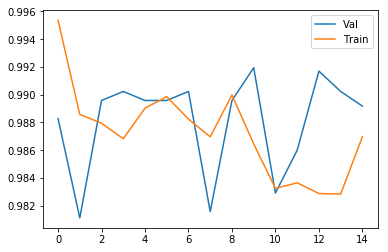

In [20]:
print(history.history.keys())
plt.plot(history.history['val_acc'],label="Val")
plt.plot(history.history['acc'],label="Train")
plt.legend()
plt.show()

In [18]:
# model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_1_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=256),
                    steps_per_epoch=(len(X_train) // 256)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=256),
                    validation_steps=(len(X_test)//256)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
 33/188 [====>.........................] - ETA: 41s - loss: 0.0122 - acc: 0.9963

Process ForkPoolWorker-64:
Process ForkPoolWorker-61:
Process ForkPoolWorker-56:
Process ForkPoolWorker-60:
Process ForkPoolWorker-54:
Process ForkPoolWorker-63:
Process ForkPoolWorker-55:
Process ForkPoolWorker-59:
Process ForkPoolWorker-52:
Process ForkPoolWorker-58:
Process ForkPoolWorker-53:
Process ForkPoolWorker-57:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-50:
Process ForkPoolWorker-62:
Process ForkPoolWorker-51:
Process ForkPoolWorker-49:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self

  File "/usr/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4

Epoch 1/15

KeyboardInterrupt
KeyboardInterrupt


Epoch 1/15

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


KeyboardInterrupt: 

In [16]:
model.compile(keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_2_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=512),
                    steps_per_epoch=(len(X_train) // 512)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
94/94 [==============================] - 49s 517ms/step - loss: 0.0190 - acc: 0.9955 - val_loss: 0.1678 - val_acc: 0.9564
Epoch 2/15
94/94 [==============================] - 46s 485ms/step - loss: 0.0676 - acc: 0.9813 - val_loss: 0.0837 - val_acc: 0.9779
Epoch 3/15
94/94 [==============================] - 46s 486ms/step - loss: 0.0718 - acc: 0.9804 - val_loss: 0.0307 - val_acc: 0.9902
Epoch 4/15
94/94 [==============================] - 45s 483ms/step - loss: 0.0646 - acc: 0.9823 - val_loss: 0.0430 - val_acc: 0.9889
Epoch 5/15
94/94 [==============================] - 46s 487ms/step - loss: 0.0591 - acc: 0.9837 - val_loss: 0.0402 - val_acc: 0.9883
Epoch 6/15
94/94 [==============================] - 46s 489ms/step - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0375 - val_acc: 0.9871
Epoch 7/15
94/94 [==============================] - 46s 489ms/step - loss: 0.0577 - acc: 0.9827 - val_loss: 0.0400 - val_acc: 0.9889
Epoch 8/15
94/94 [==============================] - 45s 476ms/step - 

In [19]:
model.compile(keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_3_best.h5'))
checkpoint = ModelCheckpoint(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'),monitor='val_loss',save_weights_only=False,save_best_only=True)
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(np.expand_dims(X_train,axis=-1), Y_train, batch_size=1024),
                    steps_per_epoch=(len(X_train) // 1024)+1, 
                    epochs=15, 
                    validation_data=val_gen.flow(np.expand_dims(X_test,axis=-1),Y_test,batch_size=512),
                    validation_steps=(len(X_test)//512)+1,
                    callbacks=[checkpoint],
                    use_multiprocessing=True, workers=8)

Epoch 1/15
47/47 [==============================] - 51s 1s/step - loss: 0.0191 - acc: 0.9954 - val_loss: 0.0440 - val_acc: 0.9883
Epoch 2/15
47/47 [==============================] - 50s 1s/step - loss: 0.0380 - acc: 0.9886 - val_loss: 0.0503 - val_acc: 0.9811
Epoch 3/15
47/47 [==============================] - 50s 1s/step - loss: 0.0450 - acc: 0.9879 - val_loss: 0.0274 - val_acc: 0.9896
Epoch 4/15
47/47 [==============================] - 49s 1s/step - loss: 0.0422 - acc: 0.9868 - val_loss: 0.0368 - val_acc: 0.9902
Epoch 5/15
47/47 [==============================] - 50s 1s/step - loss: 0.0384 - acc: 0.9890 - val_loss: 0.0410 - val_acc: 0.9896
Epoch 6/15
47/47 [==============================] - 60s 1s/step - loss: 0.0372 - acc: 0.9899 - val_loss: 0.0306 - val_acc: 0.9896
Epoch 7/15
47/47 [==============================] - 56s 1s/step - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0330 - val_acc: 0.9902
Epoch 8/15
47/47 [==============================] - 47s 997ms/step - loss: 0.0404 - acc: 0

In [21]:
model.load_weights(os.path.join('/home/sivananda/MNIST/','stage_4_best.h5'))
model.save('/home/sivananda/MNIST/mnist2FC.h5')

In [47]:

res = model.evaluate(np.expand_dims(x_val,axis=-1)/255.,y_val)
res

10000/10000 [==============================] - 3s 283us/step


[0.042778794025653044, 0.9893]

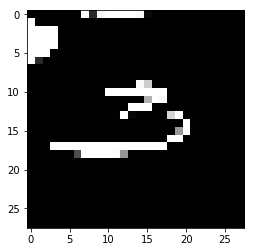

3


In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# model.load_weights('/home/sivananda/MNIST/stage_3_model.hdf5')
img = cv2.imread('/home/sivananda/Downloads/num3_dark.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bit = cv2.bitwise_not(img)
_,img = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
# img = cv2.medianBlur(img,5)
# img = cv2.resize(img,(28,28),interpolation = cv2.LINEAR)
# img = cv2.bilateralFilter(img,9,75,75)
img = cv2.GaussianBlur(img,(5,5),0)
img = cv2.resize(img,(28,28))
inp = np.reshape(img, (1,28,28,1))/255.

plt.imshow(img,cmap='gray')
plt.show()
p1 = model.predict(inp)
# print(p)
print(np.argmax(p1))


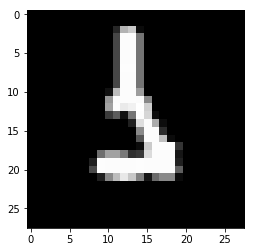

Pred:  3
Actual:  1


In [78]:
idx = np.random.randint(len(x_val))
img = x_val[idx]

plt.imshow(img,cmap='gray')
plt.show()

inp = np.reshape(img,(1,28,28,1))/255.
p1 = model.predict(inp)
# print(p)
print("Pred: ",np.argmax(p1))
print("Actual: ", np.argmax(y_val[idx]))


In [6]:
model.load_weights('/home/sivananda/MNIST/mnist2FC.h5')

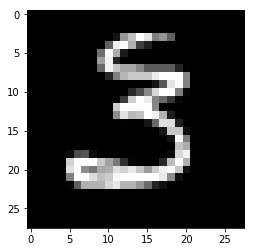

Pred:  3
Actual:  0


In [7]:
idx = 5878
# idx = np.random.randint(len(x_val))
img = x_val[idx]

plt.imshow(img,cmap='gray')
plt.show()

inp = np.reshape(img,(1,28,28,1))/255.
p1 = model.predict(inp)
# print(p)
print("Pred: ",np.argmax(p1))
print("Actual: ", np.argmax(y_val[idx]))

In [6]:
from keras.models import Sequential
from keras.models import Model
# from keras.engine.input_layer import Input

inp = (28,28,1)

# model = Sequential()
inp = Input(shape=inp)
L1 = BatchNormalization()(inp)
L1 = Conv2D(8,(1,1),padding='same')(L1)
L1 = Activation('relu')(L1)
L1 = BatchNormalization()(L1)
L1 = Conv2D(8,(3,3),padding='same')(L1)
L1 = Activation('relu')(L1)
L1 = BatchNormalization()(L1)
L1 = MaxPool2D((2,2))(L1)

L2 = Conv2D(16,(1,1),padding='same')(L1)
L2 = Activation('relu')(L2)
L2 = BatchNormalization()(L2)
L2 = Conv2D(16,(3,3),padding='same')(L2)
L2 = Activation('relu')(L2)
L2 = BatchNormalization()(L2)
L2 = MaxPool2D((2,2))(L2)

L3 = Conv2D(32,(1,1),padding='same')(L2)
L3 = Activation('relu')(L3)
L3 = BatchNormalization()(L3)
L3 = Conv2D(32,(3,3),padding='same')(L3)
L3 = Activation('relu')(L3)
L3 = BatchNormalization()(L3)
L3 = MaxPool2D((2,2))(L3)

L4 = Conv2D(64,(1,1),padding='same')(L3)
L4 = Activation('relu')(L4)
L4 = BatchNormalization()(L4)
L4 = Conv2D(64,(3,3),padding='same')(L4)
L4 = Activation('relu')(L4)
L4 = BatchNormalization()(L4)

L5 = GlobalMaxPooling2D()(L4)
FC1 = Dense(128,activation='relu')(L5)
FC2 = Dense(256,activation='relu')(FC1)

output = Dense(10,activation='softmax')(FC2)

model1 = Model(inp,output)

model1.summary()
model1.load_weights('/home/sivananda/MNIST/mnist2FC.h5')








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         16        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 8)         0         
___

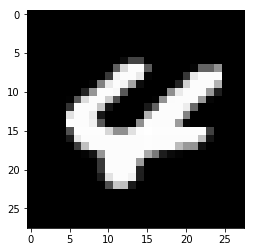

Pred:  4
Actual:  0
conv2d_1


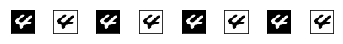

activation_1


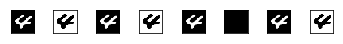

batch_normalization_2


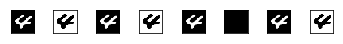

conv2d_2


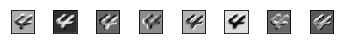

activation_2


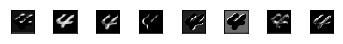

batch_normalization_3


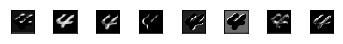

max_pooling2d_1


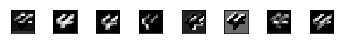

conv2d_3


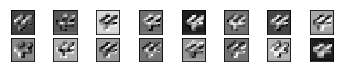

activation_3


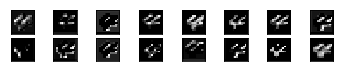

batch_normalization_4


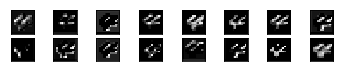

conv2d_4


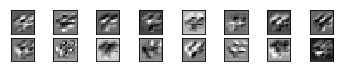

activation_4


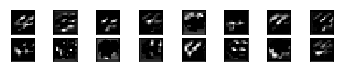

batch_normalization_5


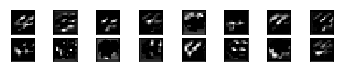

max_pooling2d_2


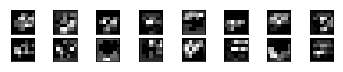

conv2d_5


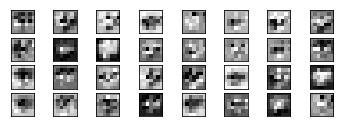

activation_5


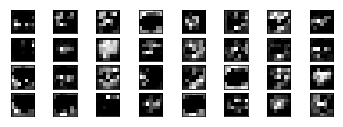

batch_normalization_6


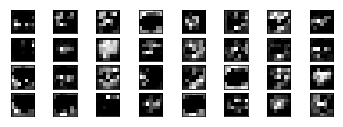

conv2d_6


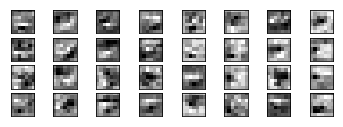

activation_6


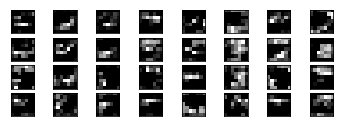

batch_normalization_7


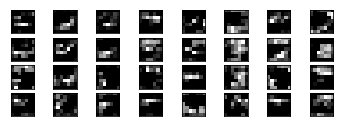

max_pooling2d_3


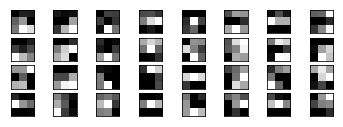

conv2d_7


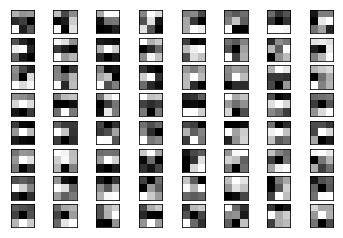

activation_7


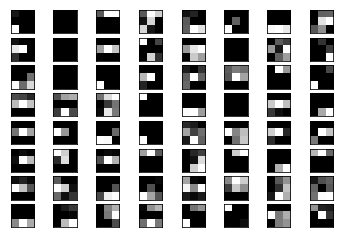

batch_normalization_8


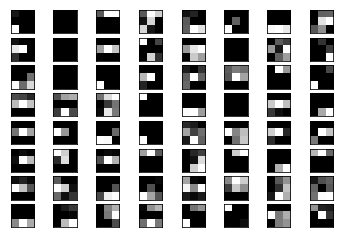

conv2d_8


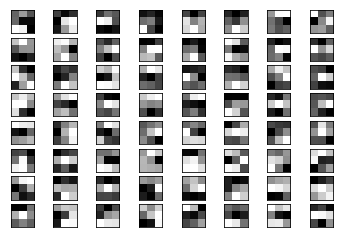

activation_8


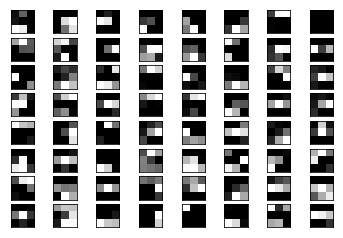

batch_normalization_9


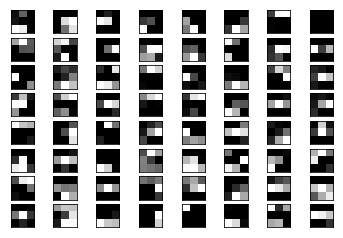

In [11]:
### Plotting the output of each layer
from keras.models import Model

idx = np.random.randint(len(x_val))
img = x_val[idx]

plt.imshow(img,cmap='gray')
plt.show()

inp = np.reshape(img,(1,28,28,1))/255.
p1 = model1.predict(inp)
# print(p)
print("Pred: ",np.argmax(p1))
print("Actual: ", np.argmax(y_val[idx]))


def plot_per_layer(pred):
    fig = plt.figure()
    
#     pred = np.rollaxis(pred,3,1)
    square = 8
    for fmap in pred:
        
        # plot all 64 maps in an 8x8 squares
        ix = 1
        for _ in range(square):
            for _ in range(square):
                if ix > fmap.shape[-1]:
                    break
                # specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(fmap[:, :, ix-1], cmap='gray')
                ix += 1
        # show the figure
        plt.show()


for L in model1.layers[2:-4]:
    M1 = Model(model1.input,L.output)
    out = M1.predict(inp)
    
    print(L.name)
    plot_per_layer(out)
    